Import Libraries

In [37]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Load the Dataset

In [15]:
data = pd.read_csv('Bank Customer Churn Prediction.csv')
data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [16]:
data.shape

(10000, 12)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Handling Duplicate Values

In [18]:
data.duplicated().sum()

0

Handling Missing Values:

In [19]:
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [20]:
data = data.dropna()

Remove unused features

In [21]:
data.drop('customer_id', inplace=True, axis=1)

In [22]:
data.dtypes

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

 Remove Unnecessary Columns

In [23]:
numerical_cols = data.select_dtypes(include=[np.number])

corr_matrix = numerical_cols.corr().abs()

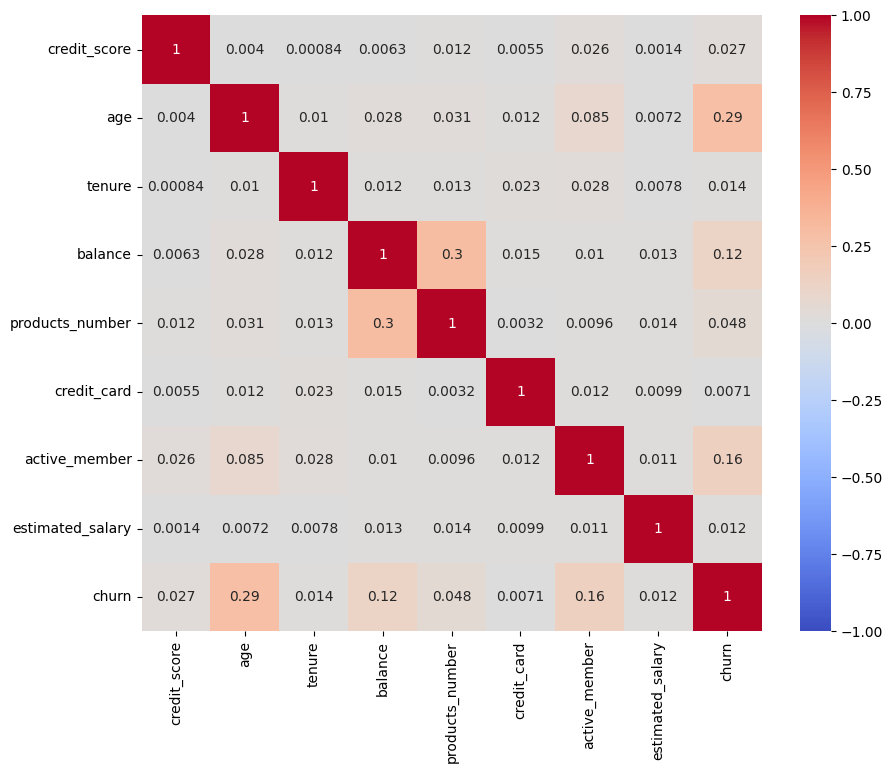

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [25]:
# Set threshold for correlation
threshold = 0.7

# Find and display highly correlated features
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)
            print(f"Highly correlated features: {colname} with {corr_matrix.columns[j]}")

# Drop the highly correlated features
data = data.drop(columns=correlated_features)

In [26]:
data.dtypes

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [27]:
categorical_cols = ['country', 'gender']

In [28]:
for col in categorical_cols:
    contingency_table = pd.crosstab(data[col], data['churn'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-Square Test for {col}: p-value = {p}")

Chi-Square Test for country: p-value = 3.8303176053541544e-66
Chi-Square Test for gender: p-value = 2.2482100097131755e-26


In [29]:
columns_to_drop = ['country','gender']
data = data.drop(columns=columns_to_drop)

In [30]:
data

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


Fix Outliers

In [31]:
data.dtypes

credit_score          int64
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [32]:
features = ['credit_score', 'age','tenure','products_number', 'balance', 'estimated_salary' ]

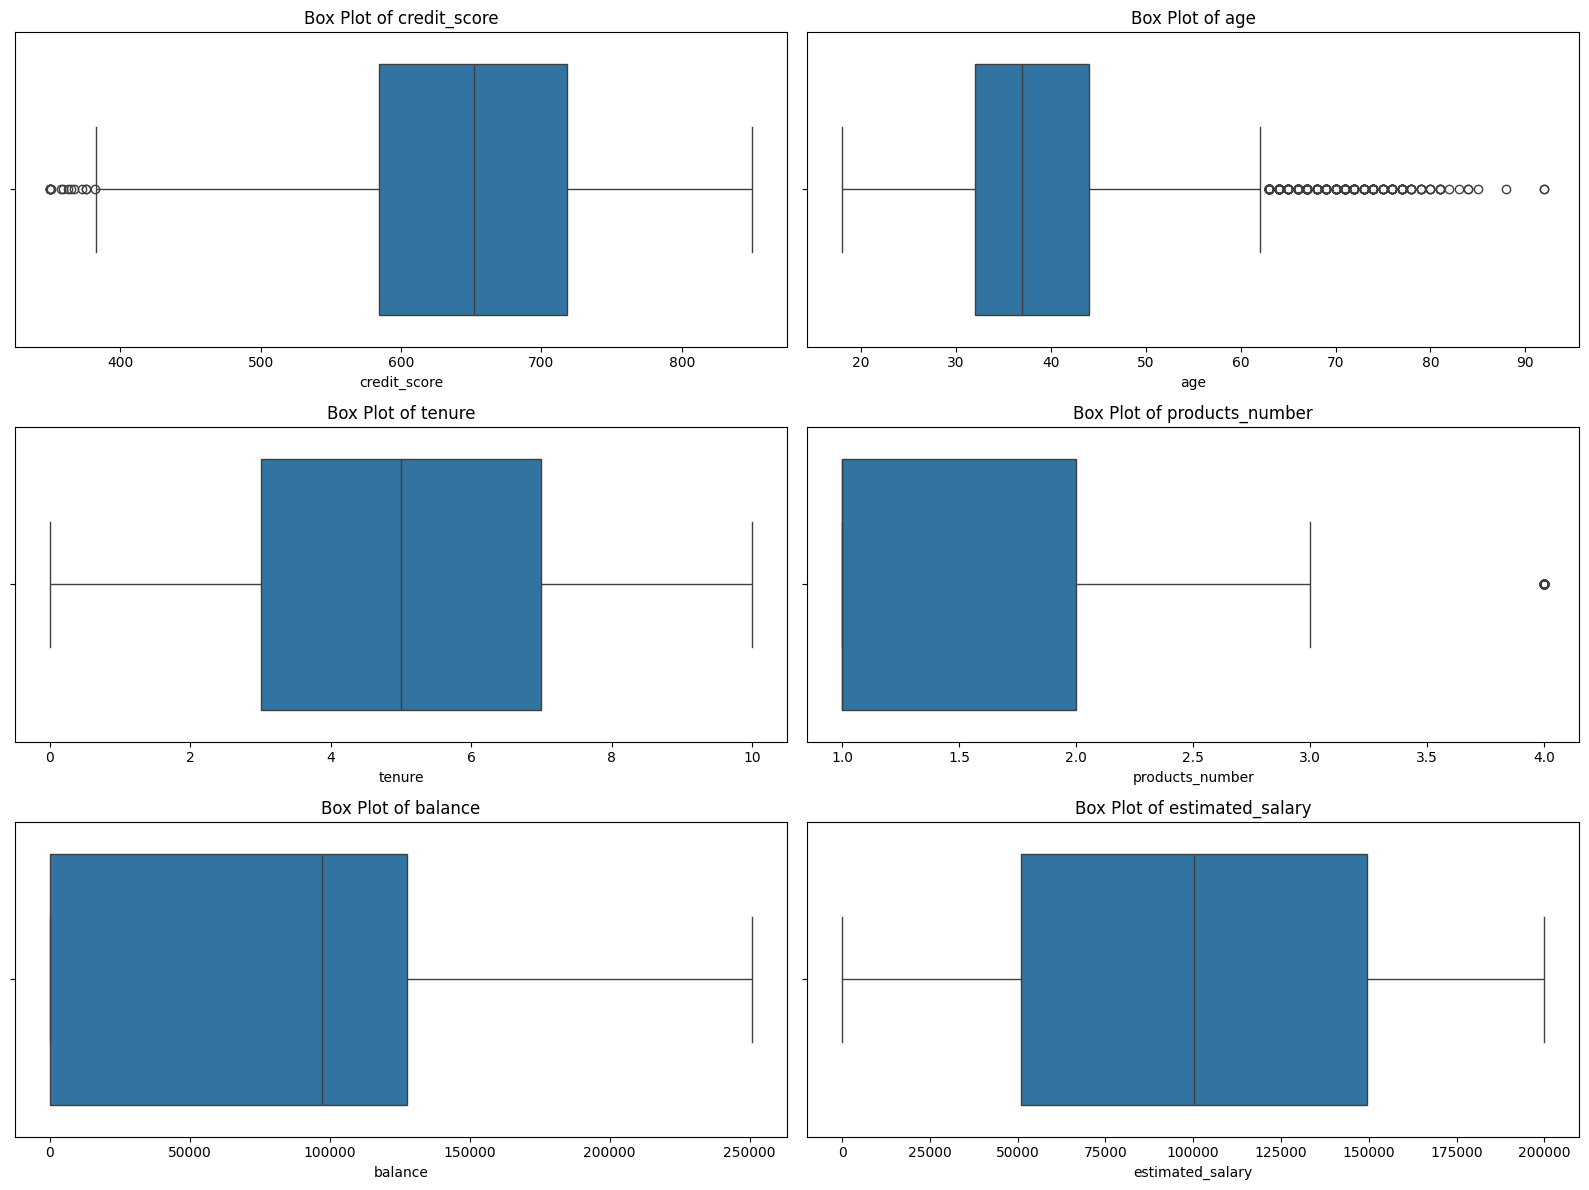

In [33]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(features):
  sns.boxplot(x=feature, data=data, ax=axes[i])
  axes[i].set_title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

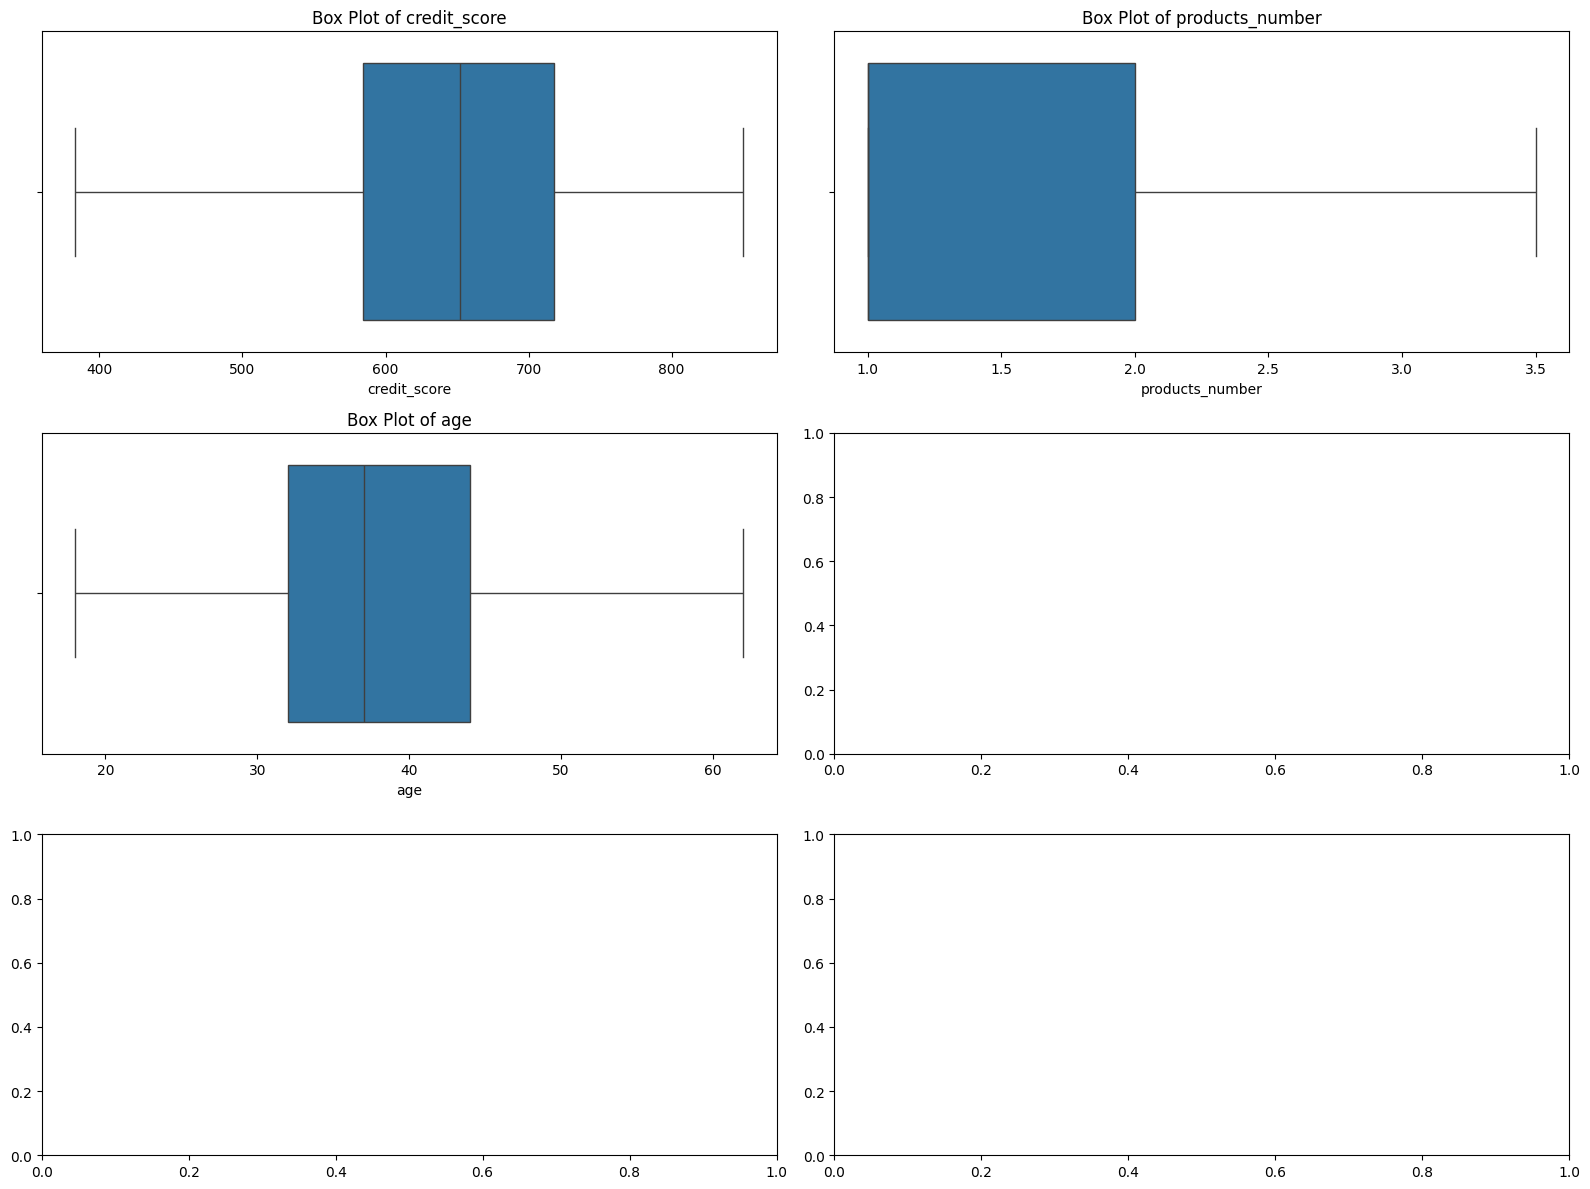

In [34]:
features = ['credit_score','products_number','age']

# Apply winsorization to handle outliers
for feature in features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    data[feature] = np.where(data[feature] < lower_limit, lower_limit, data[feature])
    data[feature] = np.where(data[feature] > upper_limit, upper_limit, data[feature])

# Plot the box plots after handling outliers
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(x=feature, data=data, ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

In [35]:
features = ['credit_score', 'age','tenure','products_number', 'balance', 'estimated_salary' ]

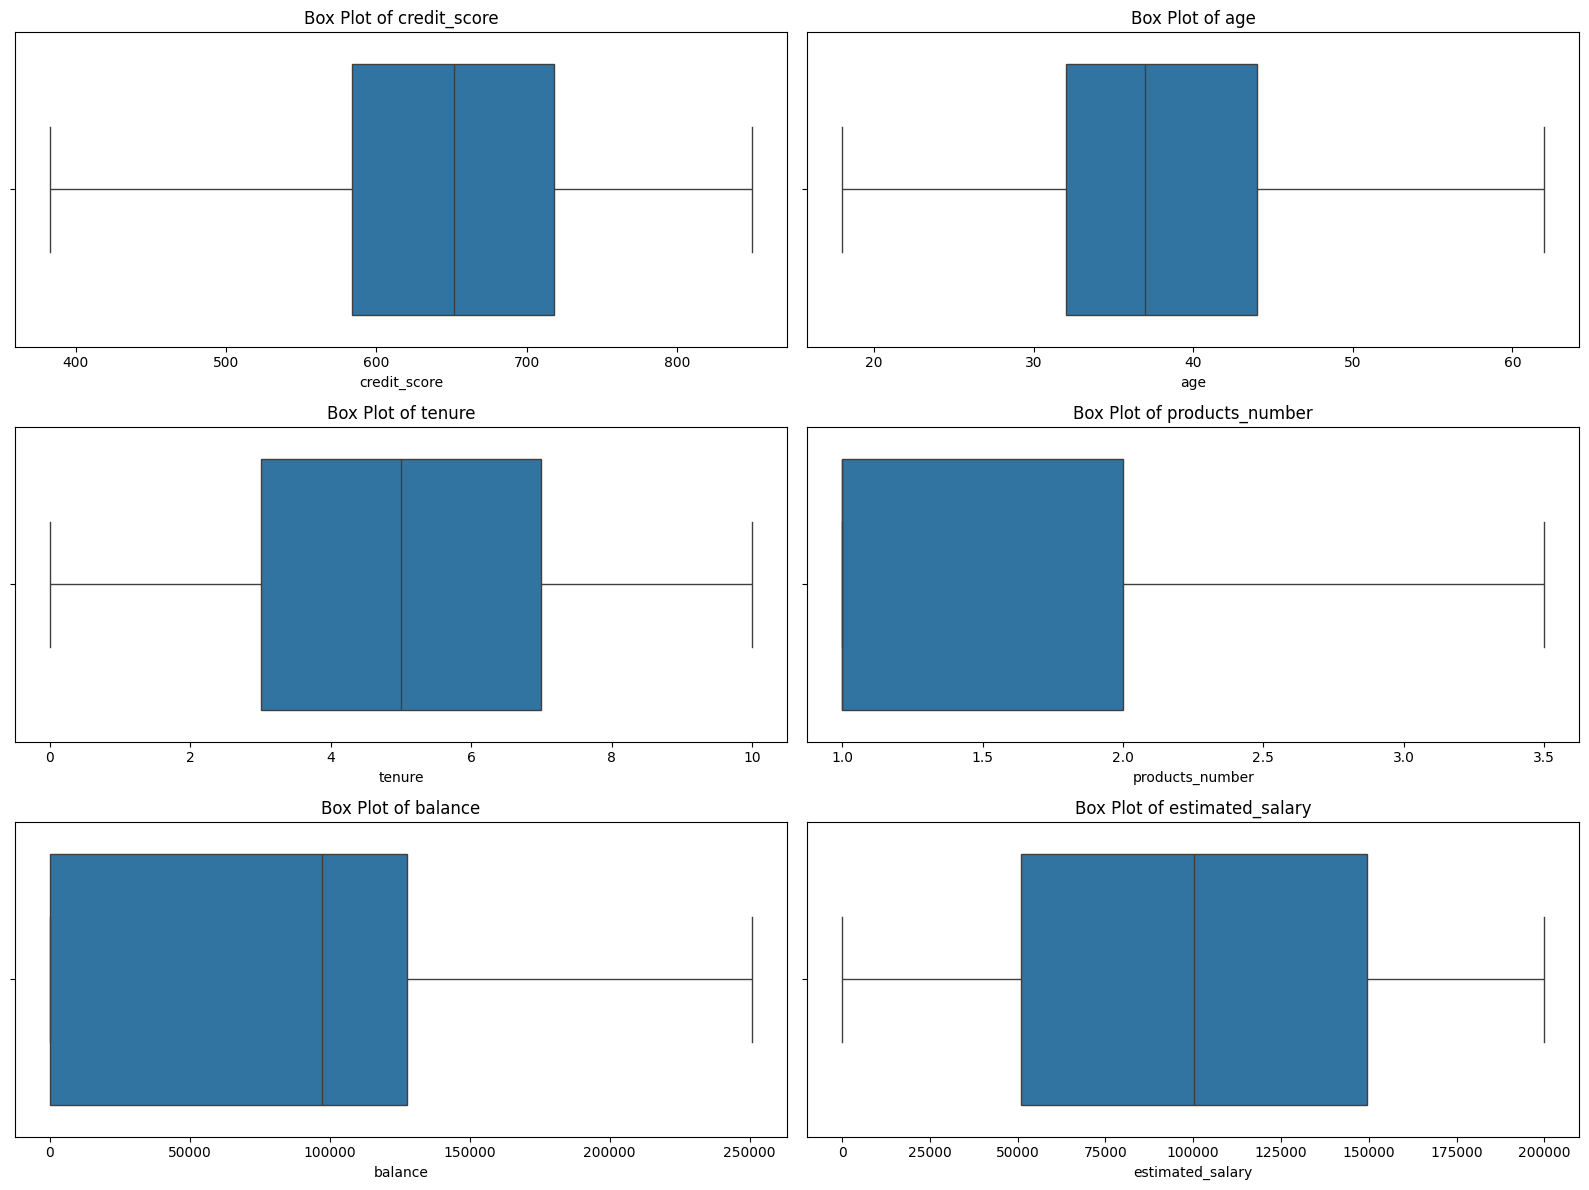

In [36]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(features):
  sns.boxplot(x=feature, data=data, ax=axes[i])
  axes[i].set_title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

normalize  data

In [38]:
df = pd.DataFrame(data)

In [39]:
features_to_normalize = ["credit_score", "age", "tenure", "balance", "products_number", "credit_card","active_member","estimated_salary"]

scaler = MinMaxScaler()

df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])
print(df)

      credit_score       age  tenure   balance  products_number  credit_card  \
0         0.505353  0.545455     0.2  0.000000              0.0          1.0   
1         0.481799  0.522727     0.1  0.334031              0.0          0.0   
2         0.254818  0.545455     0.8  0.636357              0.8          1.0   
3         0.676660  0.477273     0.1  0.000000              0.4          0.0   
4         1.000000  0.568182     0.2  0.500246              0.0          1.0   
...            ...       ...     ...       ...              ...          ...   
9995      0.830835  0.477273     0.5  0.000000              0.4          1.0   
9996      0.284797  0.386364     1.0  0.228657              0.0          1.0   
9997      0.698073  0.409091     0.7  0.000000              0.0          0.0   
9998      0.832976  0.545455     0.3  0.299226              0.4          1.0   
9999      0.875803  0.227273     0.4  0.518708              0.0          1.0   

      active_member  estimated_salary  

Balancing Imbalanced Data

In [43]:
df['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

In [44]:
X = df.drop('churn', axis=1)
y = df['churn']


smote = SMOTE(random_state=42)


X_smote, y_smote = smote.fit_resample(X, y)

balanced_data = pd.concat([pd.DataFrame(X_smote, columns=X.columns), pd.DataFrame(y_smote, columns=['churn'])], axis=1)


print(balanced_data['churn'].value_counts())


churn
1    7963
0    7963
Name: count, dtype: int64


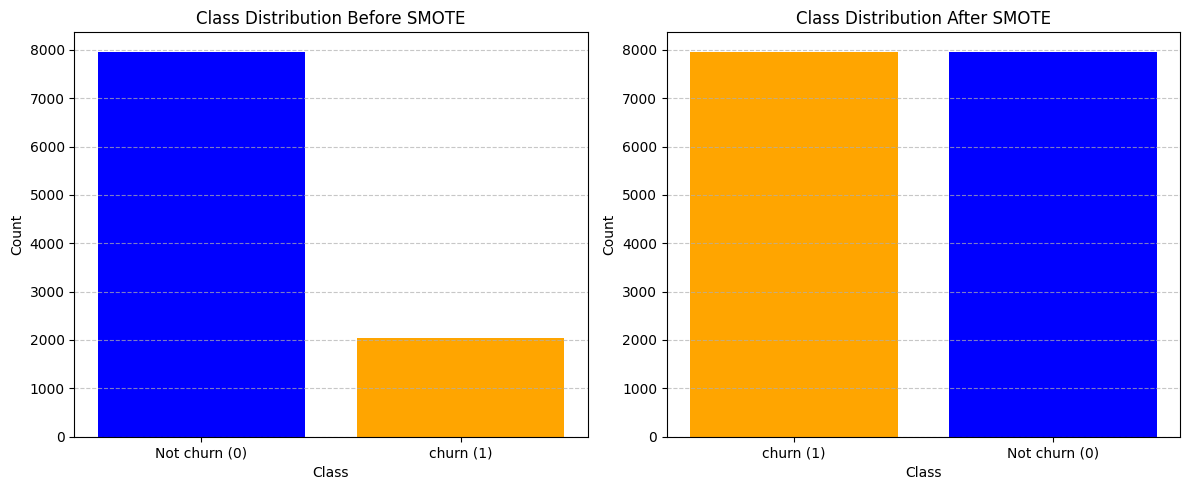

In [45]:
X = df.drop('churn', axis=1)
y = df['churn']

before_smote_counts = y.value_counts()

smote = SMOTE(random_state=42)

X_smote, y_smote = smote.fit_resample(X, y)

after_smote_counts = pd.Series(y_smote).value_counts()

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot class distribution before SMOTE
axs[0].bar(before_smote_counts.index, before_smote_counts.values, color=['blue', 'orange'])
axs[0].set_title('Class Distribution Before SMOTE')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Count')
axs[0].set_xticks(before_smote_counts.index)
axs[0].set_xticklabels(['Not churn (0)', 'churn (1)'])
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot class distribution after SMOTE
axs[1].bar(after_smote_counts.index, after_smote_counts.values, color=['blue', 'orange'])
axs[1].set_title('Class Distribution After SMOTE')
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Count')
axs[1].set_xticks(after_smote_counts.index)
axs[1].set_xticklabels(['Not churn (0)', 'churn (1)'])
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [46]:
balanced_data.shape

(15926, 9)

export data set

In [47]:
output_file_path = 'preprocessed_data.csv'

In [48]:
balanced_data.to_csv(output_file_path, index=False)

print(f"Preprocessed data has been exported to: {output_file_path}")

Preprocessed data has been exported to: preprocessed_data.csv
